**Group Members**

1. Thiti Leelasomphop

2. Peem Simasathien

3. Tach Padthamkul

# **Load Dependencies**

In [ ]:
#!pip install pycaret

In [1]:
import pandas as pd
from pycaret.clustering import *
import datetime

# **Load Data**

In [2]:
df = pd.read_csv('Supermarket Data.csv')

In [3]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [4]:
copy_ver=df.copy()

In [5]:
df.tail(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
956569,200617,2006-06-22,5,12,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994101100088778,M,MM,Top Up,Fresh,STORE00002,LS,W01
956570,200633,2006-10-13,6,20,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102700099738,L,LA,Top Up,Fresh,STORE00002,LS,W01
956571,200617,2006-06-22,5,18,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000544241,LA,YA,994101100506174,L,LA,Top Up,Fresh,STORE00002,LS,W01
956572,200619,2006-07-06,5,19,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000423155,LA,YF,994101300433650,L,LA,Full Shop,Fresh,STORE00002,LS,W01
956573,200635,2006-10-23,2,21,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,994102900104676,L,MM,Top Up,Fresh,STORE00002,LS,W01


In [6]:
df['morning']=np.where(df['SHOP_HOUR']<=12,1,0)
df['evening']=np.where(df['SHOP_HOUR']>=18,1,0)

In [7]:
df['weekend']=np.where((df['SHOP_WEEKDAY']==1)|(df['SHOP_WEEK']==7),1,0)

In [8]:
check=df.drop_duplicates(subset=['BASKET_ID'])
check

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,morning,evening,weekend
0,200732,2007-10-05,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02,0,0,0
1,200733,2007-10-10,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02,0,1,0
2,200741,2007-12-09,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02,1,0,1
3,200731,2007-09-29,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02,0,0,0
4,200737,2007-11-10,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956316,200642,2006-12-15,6,17,4,4.24,PRD0904994,CL00033,DEP00008,G00004,D00002,NaN,NaN,NaN,994103600128019,M,MM,Small Shop,Fresh,STORE00002,LS,W01,0,0,0
956388,200814,2008-05-29,5,17,4,4.24,PRD0904994,CL00033,DEP00008,G00004,D00002,NaN,NaN,NaN,994111200059308,M,MM,Small Shop,Fresh,STORE00002,LS,W01,0,0,0
956404,200632,2006-10-05,5,13,3,3.18,PRD0904994,CL00033,DEP00008,G00004,D00002,NaN,NaN,NaN,994102600028677,M,MM,Small Shop,Fresh,STORE00002,LS,W01,0,0,0
956438,200640,2006-12-01,6,15,1,1.45,PRD0904995,CL00075,DEP00022,G00007,D00002,NaN,NaN,NaN,994103400118691,S,LA,Small Shop,Fresh,STORE00002,LS,W01,0,0,0


# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs


# Calculate features

In [9]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max')
                                                                                  ).reset_index()

In [10]:
df_csv=df_csv.set_index('CUST_CODE')
df_csv.head(5)

,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate
CUST_CODE,,,,,
CUST0000000181,2.44,1,1,2007-01-06,2007-01-06
CUST0000000369,959.33,220,189,2006-04-16,2008-07-05
CUST0000000689,328.57,16,116,2007-07-22,2008-06-23
CUST0000000998,5.95,3,4,2006-05-04,2006-07-07
CUST0000001163,39.74,4,24,2006-10-22,2008-06-22


In [11]:
##prepare customer single view
df2_csv = df2_groupby = check[check['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(Weekend_count=('weekend','sum'),
                                                                                         Avg_shophour=('SHOP_HOUR','mean'),
                                                                                          morning_times=('morning','sum'),
                                                                                          evening_times=('evening','sum')                                                                   
                                                                                         ).reset_index()

In [12]:
df2_csv=df2_csv.set_index('CUST_CODE')
df2_csv.head(5)

,Weekend_count,Avg_shophour,morning_times,evening_times
CUST_CODE,,,,
CUST0000000181,0,13.000000,0,0
CUST0000000369,29,15.409091,36,47
CUST0000000689,3,17.812500,3,12
CUST0000000998,1,10.333333,2,0
CUST0000001163,2,14.750000,0,0


In [13]:
df_csv['weekend_count']=df2_csv['Weekend_count']
df_csv['Avg_shophour']=df2_csv['Avg_shophour']
df_csv['morning_times']=df2_csv['morning_times']
df_csv['evening_times']=df2_csv['evening_times']
df_csv['afternoon_times']=df_csv['TotalVisits']-df_csv['morning_times']-df_csv['evening_times']

In [14]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [15]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [16]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [17]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [18]:
#Average visits
df_csv['avg_visit_fre']=np.where(df_csv['TotalVisits']==1,np.nan,df_csv['total_days']/(df_csv['TotalVisits']-1))

In [19]:
df_csv=df_csv.dropna()

In [20]:
# Percent visit on weekend
df_csv['Percent_weekend']=df_csv['weekend_count']/df_csv['TotalVisits']

In [21]:
# Percent of visit by time of day
df_csv['Percent_morning']=df_csv['morning_times']/df_csv['TotalVisits']
df_csv['Percent_afternoon']=df_csv['afternoon_times']/df_csv['TotalVisits']
df_csv['Percent_evening']=df_csv['evening_times']/df_csv['TotalVisits']

In [22]:
df_csv

,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,weekend_count,Avg_shophour,morning_times,evening_times,afternoon_times,TicketSize,total_days,recency,avg_visit_fre,Percent_weekend,Percent_morning,Percent_afternoon,Percent_evening
CUST_CODE,,,,,,,,,,,,,,,,,,
CUST0000000369,959.33,220,189,2006-04-16,2008-07-05,29,15.409091,36,47,137,4.360591,812,1,3.707763,0.131818,0.163636,0.622727,0.213636
CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,3,17.812500,3,12,1,20.535625,338,13,22.533333,0.187500,0.187500,0.062500,0.750000
CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,1,10.333333,2,0,1,1.983333,65,730,32.500000,0.333333,0.666667,0.333333,0.000000
CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,2,14.750000,0,0,4,9.935000,610,14,203.333333,0.500000,0.000000,1.000000,0.000000
CUST0000001194,2493.83,103,403,2006-04-22,2008-06-20,17,17.262136,5,54,44,24.211942,791,16,7.754902,0.165049,0.048544,0.427184,0.524272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUST0000999569,700.21,109,47,2006-09-01,2008-07-04,15,15.100917,13,17,79,6.423945,673,2,6.231481,0.137615,0.119266,0.724771,0.155963
CUST0000999593,453.58,30,206,2006-05-06,2008-04-02,7,14.166667,7,2,21,15.119333,698,95,24.068966,0.233333,0.233333,0.700000,0.066667
CUST0000999645,105.11,11,46,2006-04-30,2008-05-08,2,19.000000,0,9,2,9.555455,740,59,74.000000,0.181818,0.000000,0.181818,0.818182


# **Cluster customers**

In [23]:
df_csv=df_csv.reset_index()

In [24]:
df_csv.columns.to_list()

['CUST_CODE',
 'TotalSpend',
 'TotalVisits',
 'TotalSKUs',
 'FirstDate',
 'LastDate',
 'weekend_count',
 'Avg_shophour',
 'morning_times',
 'evening_times',
 'afternoon_times',
 'TicketSize',
 'total_days',
 'recency',
 'avg_visit_fre',
 'Percent_weekend',
 'Percent_morning',
 'Percent_afternoon',
 'Percent_evening']

In [77]:
selected=['TotalSpend',
          'TotalVisits',
          'TicketSize',
          'recency',
          'total_days',
          'avg_visit_fre',
          'Percent_weekend']

In [78]:
from pycaret.clustering import *
exp_clu = setup(data=df_csv[selected], normalize=True)

,Description,Value
0,session_id,8914
1,Original Data,"(4075, 7)"
2,Missing Values,False
3,Numeric Features,7
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(4075, 7)"
9,CPU Jobs,-1


In [79]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [80]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x0000023C54BB0288>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x0000023...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x0000023C54...,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x0000023C54A64...,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x0000023C54A...,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x0000023C54A6...,make_scorer(completeness_score),pred,{},True,True,False


# Compare model performance

In [81]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0798,25.5019,6.4228,0,0,0


In [82]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
sc,0.865500,87.445500,0.093800,0,0,0
kmeans,0.307500,1235.522200,1.227500,0,0,0
ap,0.224700,602.845900,1.038600,0,0,0
hclust,0.222100,964.877700,1.384700,0,0,0
birch,0.208100,582.958200,1.265700,0,0,0
kmodes,-0.079800,25.501900,6.422800,0,0,0
dbscan,-0.287700,56.759400,1.439200,0,0,0


# Spectral Clustering Clustering

In [83]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8655,87.4455,0.0938,0,0,0


In [84]:
plot_model(sc)

# KMeans Clustering

In [85]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3075,1235.5222,1.2275,0,0,0


In [86]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=8914, tol=0.0001, verbose=0)


In [87]:
plot_model(kmeans)

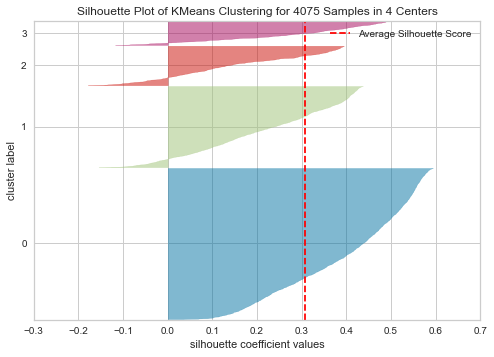

In [88]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

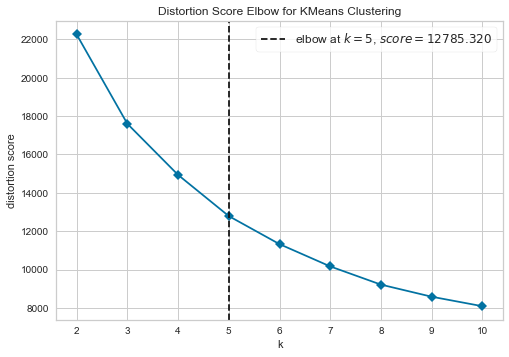

In [89]:
plot_model(kmeans, plot = 'elbow')

In [90]:
kmeans2 = create_model('kmeans',num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3296,1252.6183,1.0773,0,0,0


In [91]:
print(kmeans2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=8914, tol=0.0001, verbose=0)


In [92]:
plot_model(kmeans2)

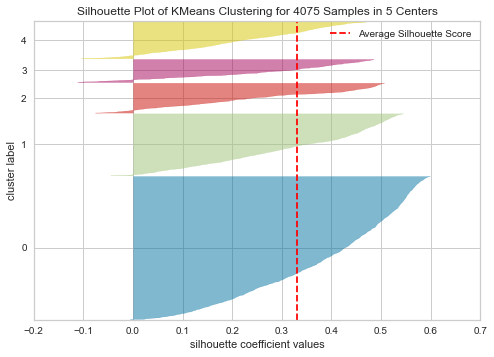

In [93]:
plot_model(kmeans2, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **Interpret results and plan for actions**

In [94]:
kmeans_predictions = predict_model(kmeans2, data = df_csv)

In [95]:
kmeans_predictions

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,weekend_count,Avg_shophour,morning_times,evening_times,afternoon_times,TicketSize,total_days,recency,avg_visit_fre,Percent_weekend,Percent_morning,Percent_afternoon,Percent_evening,Cluster
0,CUST0000000369,959.33,220,189,2006-04-16,2008-07-05,29,15.409091,36,47,137,4.360591,812,1,3.707763,0.131818,0.163636,0.622727,0.213636,Cluster 3
1,CUST0000000689,328.57,16,116,2007-07-22,2008-06-23,3,17.812500,3,12,1,20.535625,338,13,22.533333,0.187500,0.187500,0.062500,0.750000,Cluster 0
2,CUST0000000998,5.95,3,4,2006-05-04,2006-07-07,1,10.333333,2,0,1,1.983333,65,730,32.500000,0.333333,0.666667,0.333333,0.000000,Cluster 1
3,CUST0000001163,39.74,4,24,2006-10-22,2008-06-22,2,14.750000,0,0,4,9.935000,610,14,203.333333,0.500000,0.000000,1.000000,0.000000,Cluster 4
4,CUST0000001194,2493.83,103,403,2006-04-22,2008-06-20,17,17.262136,5,54,44,24.211942,791,16,7.754902,0.165049,0.048544,0.427184,0.524272,Cluster 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,CUST0000999569,700.21,109,47,2006-09-01,2008-07-04,15,15.100917,13,17,79,6.423945,673,2,6.231481,0.137615,0.119266,0.724771,0.155963,Cluster 0
4071,CUST0000999593,453.58,30,206,2006-05-06,2008-04-02,7,14.166667,7,2,21,15.119333,698,95,24.068966,0.233333,0.233333,0.700000,0.066667,Cluster 0
4072,CUST0000999645,105.11,11,46,2006-04-30,2008-05-08,2,19.000000,0,9,2,9.555455,740,59,74.000000,0.181818,0.000000,0.181818,0.818182,Cluster 0
4073,CUST0000999935,444.17,21,127,2006-11-29,2008-06-05,2,15.333333,3,3,15,21.150952,555,31,27.750000,0.095238,0.142857,0.714286,0.142857,Cluster 0


In [96]:
from pycaret.classification import *

In [97]:
selected.append('Cluster')

In [98]:
exp_clf = setup(kmeans_predictions[selected], target = 'Cluster' , normalize=True)

,Description,Value
0,session_id,1639
1,Target,Cluster
2,Target Type,Multiclass
3,Label Encoded,"Cluster 0: 0, Cluster 1: 1, Cluster 2: 2, Cluster 3: 3, Cluster 4: 4"
4,Original Data,"(4075, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [99]:
decission_tree=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9790,0.9989,0.9728,0.9798,0.9790,0.9696,0.9697
1,0.9755,0.9991,0.9801,0.9768,0.9757,0.9646,0.9647
2,0.9754,0.9994,0.9800,0.9756,0.9754,0.9643,0.9643
3,0.9930,0.9996,0.9910,0.9931,0.9930,0.9898,0.9898
4,0.9825,0.9990,0.9852,0.9828,0.9823,0.9744,0.9746
5,0.9754,0.9995,0.9729,0.9756,0.9754,0.9644,0.9644
6,0.9789,0.9995,0.9766,0.9797,0.9789,0.9695,0.9696
7,0.9544,0.9972,0.9559,0.9544,0.9542,0.9337,0.9338
8,0.9579,0.9958,0.9550,0.9581,0.9578,0.9389,0.9389
9,0.9754,0.9992,0.9636,0.9764,0.9751,0.9641,0.9644


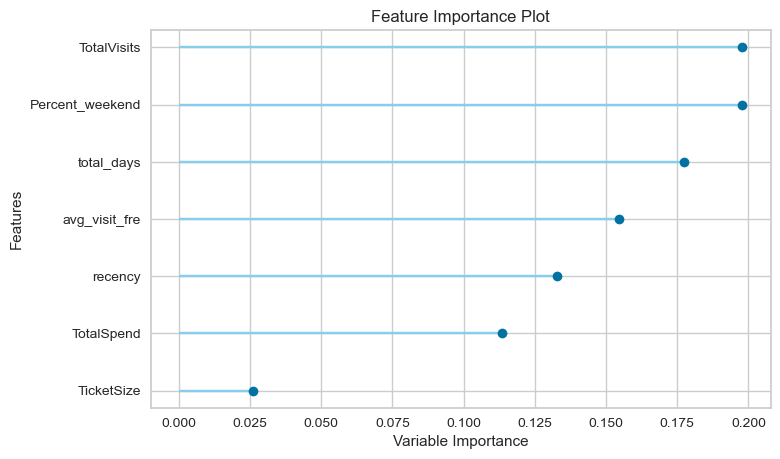

In [100]:
plot_model(decission_tree,'feature')

In [101]:
##prepare customer single view
cluster = cluster_groupby = kmeans_predictions[kmeans_predictions['Cluster'].notnull()].groupby(by=['Cluster']).agg(TotalSpend=('TotalSpend', 'mean'),
                                                                                  TotalVisits=('TotalVisits', 'mean'),
                                                                                  TotalSKUs=('TotalSKUs', 'mean'),
                                                                                  Percent_weekend=('Percent_weekend','mean'),
                                                                                  avg_visit_fre=('avg_visit_fre','mean'),
                                                                                  recency=('recency','mean'),
                                                                                  total_days=('total_days','mean'),
                                                                                  TicketSize=('TicketSize','mean'),
                                                                                  Percent_morning=('Percent_morning','mean'),
                                                                                  Percent_evening=('Percent_evening','mean'),
                                                                                  Percent_afternoon=('Percent_afternoon','mean')
                                                                                  ).reset_index()

In [102]:
cluster[selected]

,TotalSpend,TotalVisits,TicketSize,recency,total_days,avg_visit_fre,Percent_weekend,Cluster
0,293.475230,27.351187,11.987293,41.004548,650.295099,61.657369,0.132159,Cluster 0
1,33.848856,3.574096,8.987476,364.355893,143.758460,71.645951,0.026603,Cluster 1
2,18.066126,2.363196,7.735833,93.297821,533.951574,428.757869,0.051655,Cluster 2
3,2673.085893,188.931034,18.797015,5.313480,796.739812,7.321405,0.145209,Cluster 3
4,27.393925,3.386588,8.013795,242.889546,268.278107,143.072918,0.452068,Cluster 4


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median

Text(0.5, 1.0, 'Mean')

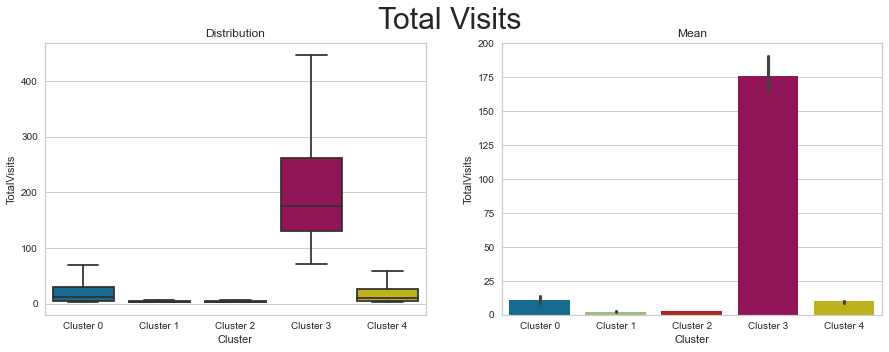

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Total Visits',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="TotalVisits",order=cluster['Cluster'].to_list(), data=kmeans_predictions,showfliers = False)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="TotalVisits",order=cluster['Cluster'].to_list(), data=kmeans_predictions,estimator=median)
ax2.set_title('Mean')

Text(0.5, 1.0, 'Mean')

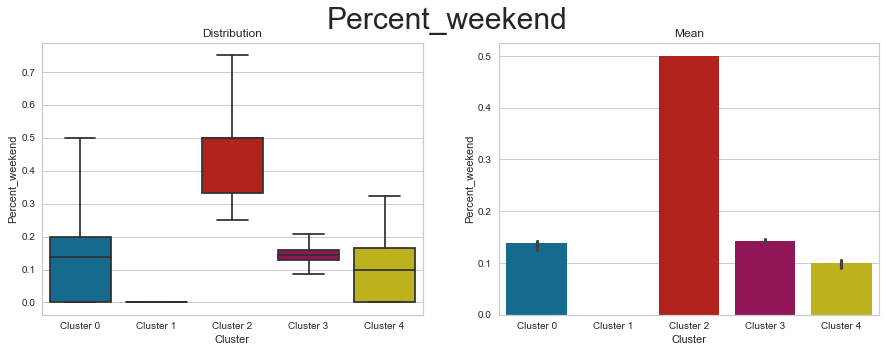

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Percent_weekend',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="Percent_weekend",order=cluster['Cluster'].to_list(), data=kmeans_predictions,showfliers = False)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="Percent_weekend",order=cluster['Cluster'].to_list(), data=kmeans_predictions,estimator=median)
ax2.set_title('Mean')

Text(0.5, 1.0, 'Mean')

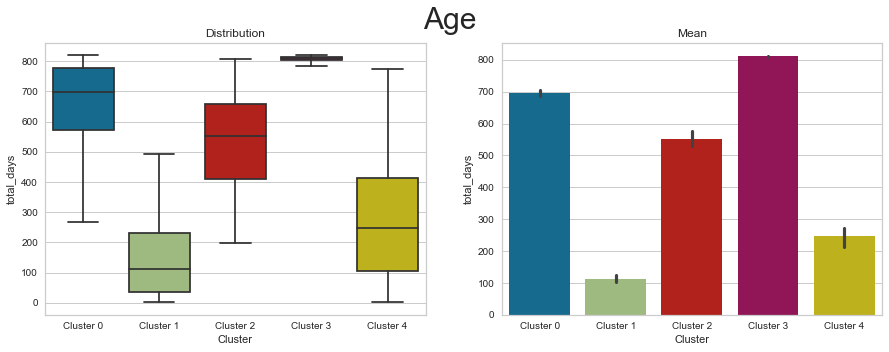

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Age',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="total_days",order=cluster['Cluster'].to_list(), data=kmeans_predictions,showfliers = False)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="total_days",order=cluster['Cluster'].to_list(), data=kmeans_predictions,estimator=median)
ax2.set_title('Mean')

Text(0.5, 1.0, 'Mean')

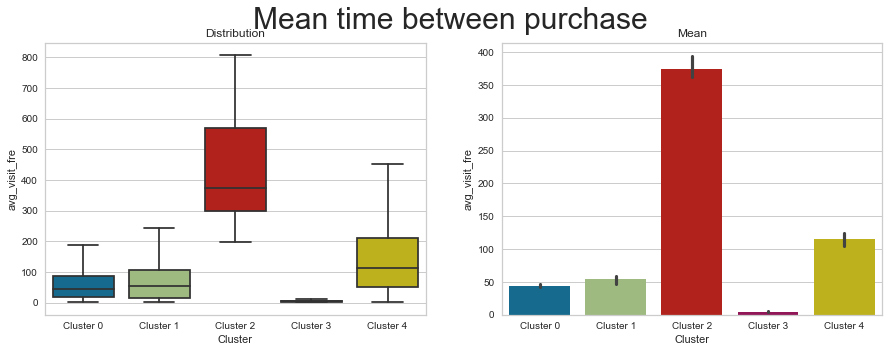

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Mean time between purchase',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="avg_visit_fre",order=cluster['Cluster'].to_list(), data=kmeans_predictions,showfliers = False)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="avg_visit_fre",order=cluster['Cluster'].to_list(), data=kmeans_predictions,estimator=median)
ax2.set_title('Mean')

Text(0.5, 1.0, 'Mean')

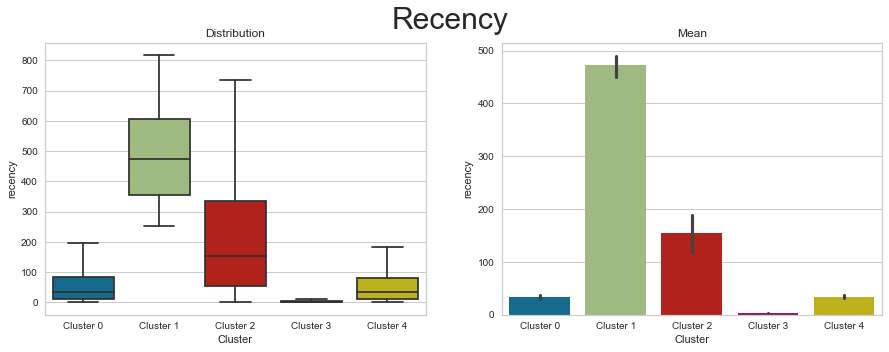

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Recency',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="recency",order=cluster['Cluster'].to_list(), data=kmeans_predictions,showfliers = False)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="recency",order=cluster['Cluster'].to_list(), data=kmeans_predictions,estimator=median)
ax2.set_title('Mean')

Text(0.5, 1.0, 'Mean')

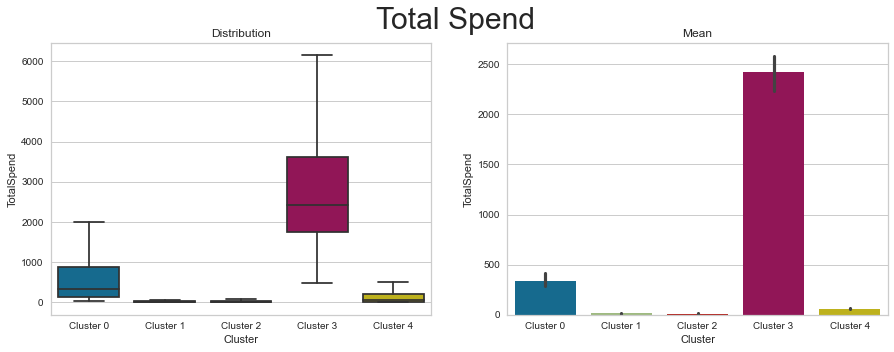

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Total Spend',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="TotalSpend",order=cluster['Cluster'].to_list(), data=kmeans_predictions,showfliers = False)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="TotalSpend",order=cluster['Cluster'].to_list(), data=kmeans_predictions,estimator=median)
ax2.set_title('Mean')

Text(0.5, 1.0, 'Mean')

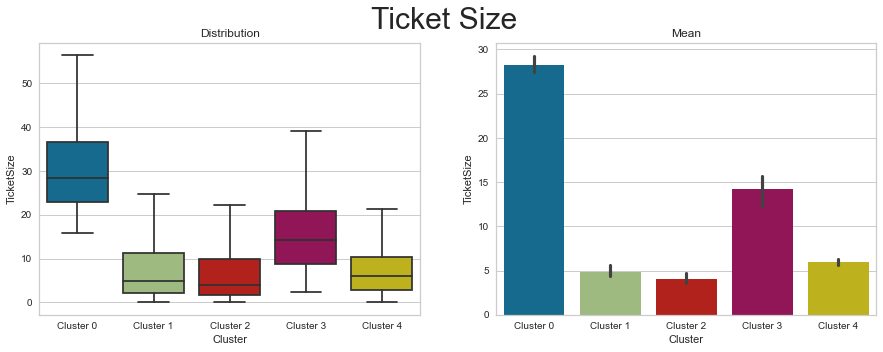

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Ticket Size',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="TicketSize",order=cluster['Cluster'].to_list(), data=kmeans_predictions,showfliers = False)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="TicketSize",order=cluster['Cluster'].to_list(), data=kmeans_predictions,estimator=median)
ax2.set_title('Mean')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Total SKUs',fontsize=30)
sns.boxplot(ax=ax1,x="Cluster",y="TotalSKUs",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax1.set_title('Distribution')
sns.barplot(ax=ax2,x="Cluster",y="TotalSKUs",order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3'], data=kmeans_predictions)
ax2.set_title('Mean')

# Summary
___
    จาก K-Mean Clustering โดยกำหนดค่า K=5 จะได้ทั้งหมด 5 กลุ่ม 
    โดย Feature สำคัญคือ Total visits -> Percent weekend -> total days -> average visit frequency -> recency -> total spend -> ticket size 


# Customer Segment
___
- Cluster 3 => Loyalty customer เป็นลูกค้าเก่าแก่มาบ่อย มาแต่ละครั้งซื้อเยอะ มีความ loyalty ไม่หนีไปไหน total visit มากสุด / Age มากสุด / Mean time between purchase ต่ำสุด / Total spend สูงสุด
- Cluster 0 => Premium customer เป็นลูกค้ามาค่อนข้างนาน แต่ไม่เท่า loyalty customer มาแต่ละครั้งซื้อเยอะ ticket size ใหญ่สุด
- Cluster 4 => General customer ลูกค้าทั่วไป ปนกันทั้งลูกค้าใหม่ ลูกค้าเก่า มาซื้อไม่ย่อยมาก แต่ก็มาเรื่อยๆ ยอดซื้อปานกลาง
- Cluster 2 => Weekender มาไม่บ่อย ส่วนใหญ่ชอบมาช่วงวันหยุดสุดสัปดาห์ มาแต่ละครั้งซื้อน้อย ticket size เล็กสุด / Total visit ต่ำสุด / Total spend ต่ำสุด
- Cluster 1 => Irregular customer Recency สูงสุด ส่วนใหญ่เพิ่งมาเป็นลูกค้าไม่นาน Age ต่ำสุด ยอดซื้อน้อย มาเฉพาะวันธรรมดา บางคนอาจจะ churn ไปแล้ว

# Action plan
___
- ลูกค้าชั้นดี : Cluster 3 และ 0 เป็นลูกค้าชั้นดี ไม่ต้องทำโปรโมชั่นอะไรมากก็มาซื้ออยู่แล้ว
    - ให้บัตร Serenade เน้นสิทธิพิเศษมากกว่าโปรโมชั่น เช่น มีที่จอดรถพิเศษใกล้ทางเข้าให้ พนักงานบริการเอาของไปส่งให้ถึงที่รถ ส่งของขวัญวันเกิดให้ทุกปี
- ลูกค้าทั่วไป : Cluster 4
    - ทำโปรโมชั่นมากขึ้น กระตุ้นให้ซื้อของมากขึ้น ทำบัตรสะสมแต้มให้พยายามขึ้นไปเป็นลูกค้า Serenade
- ลูกค้ารายย่อย :
    - Cluster 2 - ทำโปรโมชั่นวันหยุดสุดสัปดาห์ เน้นโปรโมชั่นส่วนลดในการซื้อครั้งถัดไปโดยกำหนดระยะเวลาระยะสั้นเผื่อกระตุ้นให้ลูกค้ามาบ่อยขึ้น ซื้อของเพิ่มขึ้น
    - Cluster 1 - ไม่ต้องทำโปรโมชั่นเป็นพิเศษ ส่วนใหญ่เป็นลูกค้าขาจร โอกาศในการเพิ่ม ticket size หรือ frequency ทำได้ยาก